In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [x * 10 for x in range(10)]

data

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
labels = [f'{x}!' for x in range(10)]
labels

['0!', '1!', '2!', '3!', '4!', '5!', '6!', '7!', '8!', '9!']

Text(0.5, 1.0, 'Title')

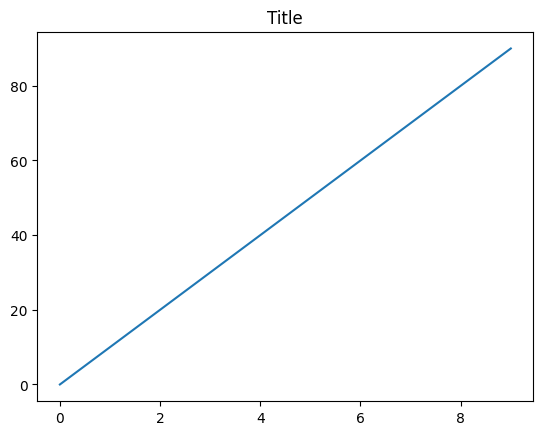

In [8]:
plt.plot(data) # x is added auto plot the y 
plt.title("Title")

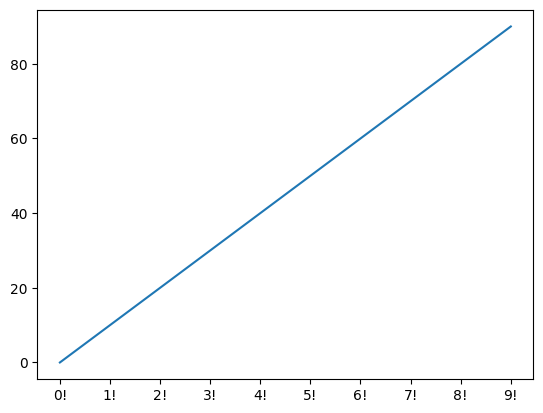

In [5]:
plt.plot(labels, data)

#plot.show() in ide

In [6]:
df = pd.DataFrame(data, labels).assign(series2 = lambda x:x[0]/2)

df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0


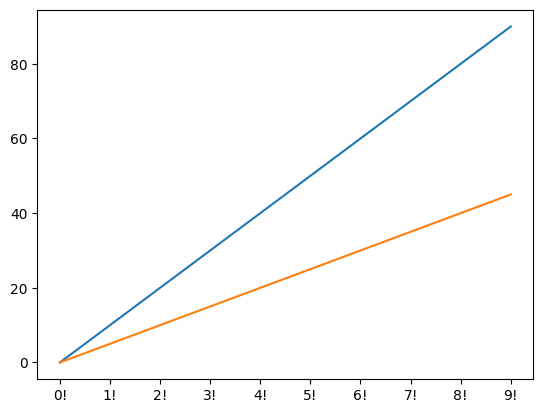

In [7]:
plt.plot(df)

### object oriented approach

Text(0.5, 0.98, 'Overall Title')

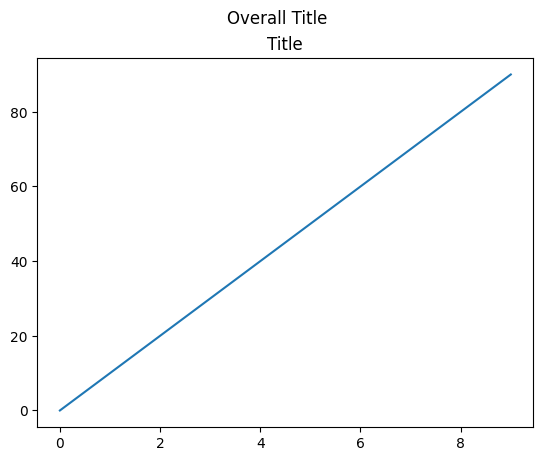

In [14]:
fig = plt.figure()

ax = fig.add_subplot()

# fig, ax = plt.subplots()

ax.plot(data)
ax.set_title("Title") # chart level title 
fig.suptitle("Overall Title") # figure level tile 

In [15]:
# from dataframes 
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data_dict = {
    "Sales":[10,20,30,40],
    "Profits": [2,4,3,1],
    "Date":["2022-01-01", "2022-02-01","2022-03-01","2022-04-01"]
}

df = pd.DataFrame(
    data_dict,
    columns=["Sales", "Profits"],
    index=data_dict["Date"]
)

df

,Sales,Profits
2022-01-01,10,2
2022-02-01,20,4
2022-03-01,30,3
2022-04-01,40,1


Text(0.5, 1.0, 'Product Sales and Profits')

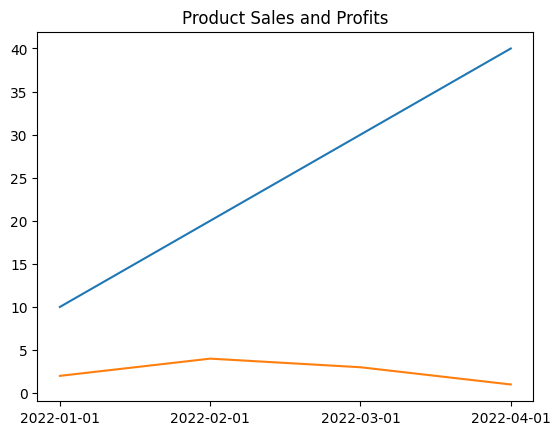

In [19]:
fig, ax = plt.subplots()

ax.plot(df)
ax.set_title("Product Sales and Profits")

Text(0.5, 1.0, 'Product Sales and Profits')

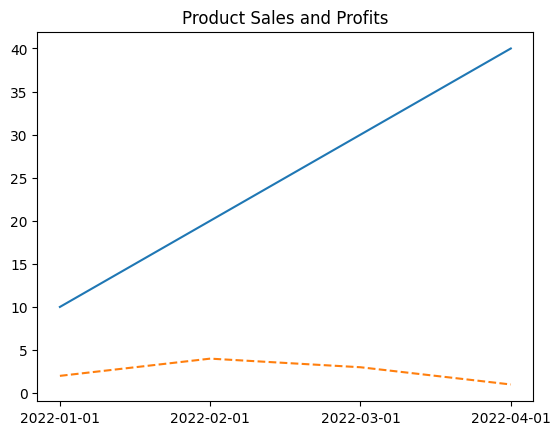

In [22]:
fig, ax = plt.subplots()

ax.plot(df.index, df["Sales"])
ax.plot(df.index, df["Profits"], ls="--")
ax.set_title("Product Sales and Profits")

In [32]:
hotels = pd.read_excel("./data/HotelCustomersDataset.xlsx")

hotels["date"] = (
    pd.to_datetime("2018-12-31")
    - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

### Assignment 1 plot df
- plot logingrevenue and otherrevenue columns in a line chart from the monthly_revenue df created below
- 

In [33]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [34]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [36]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum","OtherRevenue":"sum" })
)

monthly_revenue = daily_revenue.resample("ME").sum()

In [37]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


Text(0.5, 1.0, 'Revenue plot')

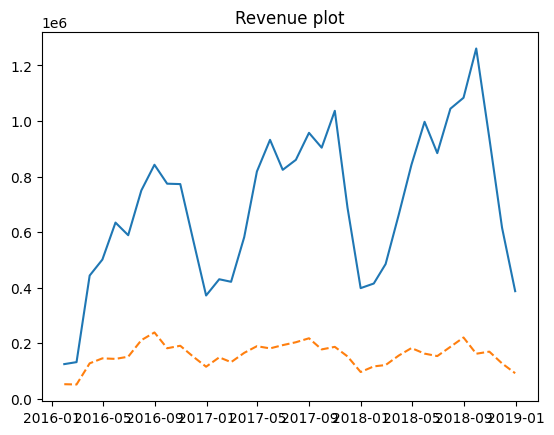

In [38]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], ls="--")
ax.set_title("Revenue plot")